<a href="https://colab.research.google.com/github/shimul1725/Currency-Exchange-Rate-Prediction/blob/main/Currency_Exchange_Rate_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#let’s import the necessary Python libraries that we need for this task and read the dataset:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import regression
sns.set()
plt.style.use('seaborn-whitegrid')

data = pd.read_csv("INR=X.csv")
print(data.head())

         Date       Open       High        Low      Close  Adj Close  Volume
0  2022-07-18  79.720497  80.255997  79.713699  79.720497  79.720497       0
1  2022-07-19  80.030296  80.148499  79.852600  80.030296  80.030296       0
2  2022-07-20  79.855904  80.118500  79.855904  79.855904  79.855904       0
3  2022-07-21  80.003403  80.271004  79.761002  80.003403  80.003403       0
4  2022-07-22  79.775902  80.076500  79.779297  79.775902  79.775902       0


<ipython-input-3-b131361b747c>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


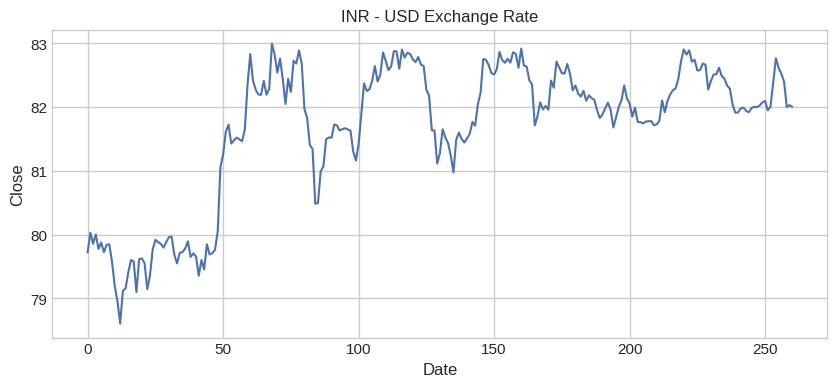

In [4]:
#In this dataset, the values in the “Close” column are the target values that we need to predict. So let’s take a closer look at these values:
plt.figure(figsize=(10, 4))
plt.title("INR - USD Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data["Close"])
plt.show()

<ipython-input-5-a105327cd03b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.corr())
<ipython-input-5-a105327cd03b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


               Open      High       Low     Close  Adj Close  Volume
Open       1.000000  0.986556  0.987504  0.999999   0.999999     NaN
High       0.986556  1.000000  0.978012  0.986559   0.986559     NaN
Low        0.987504  0.978012  1.000000  0.987496   0.987496     NaN
Close      0.999999  0.986559  0.987496  1.000000   1.000000     NaN
Adj Close  0.999999  0.986559  0.987496  1.000000   1.000000     NaN
Volume          NaN       NaN       NaN       NaN        NaN     NaN


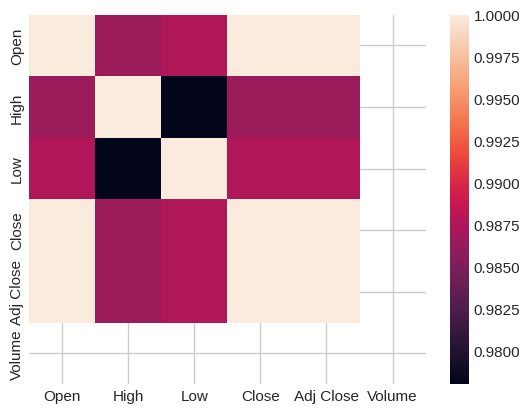

In [5]:
# Now let’s have a look at the correlation between the features before training the currency exchange rate prediction model:
print(data.corr())
sns.heatmap(data.corr())
plt.show()

In [6]:
#Now the next step is to prepare the dataset by storing the most relevant features in the variable x and storing the target column in the variable y:

x = data[["Open", "High", "Low"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

In [7]:
# Now let’s split the dataset and train a currency exchange prediction model using the Decision Tree Regression model using Python:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

In [8]:
#let’s have a look at the predicted values of currency exchange rates of Indian Rupees for the next 5 days:
data = pd.DataFrame(data={"Predicted Rate": ypred.flatten()})
print(data.head())

   Predicted Rate
0       80.030296
1       81.712502
2       81.960602
3       82.045898
4       82.622803
